<span style="font-size: 14pt">MIPT, Autumn 2017</span>

<span style="font-size: 16pt"> Example of using Test sample VS Validation Sample

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

## Generate train sample

In [13]:
import pandas as pd
from random import SystemRandom, normalvariate
import numpy as np
%matplotlib inline

L = 50
d = 1000

gen_train = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(d)] 
        for i in range(L)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(d)])

In [14]:
gen_train.head() # label - random Binary variable, columns -random variable from N(0,1)

,Label,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F990,F991,F992,F993,F994,F995,F996,F997,F998,F999
0,1,0.240696,-0.201420,1.648569,0.998323,-1.729120,0.819548,0.035348,0.811402,0.307960,...,-0.154711,-0.935731,0.243772,0.298846,-0.059489,-1.475532,1.115265,-0.308134,-0.055387,0.254099
1,1,1.277578,0.283884,1.566567,-0.188628,0.906508,0.788243,0.560542,-0.740028,-0.353834,...,-1.197793,-0.628994,2.180549,-0.220646,0.438164,-0.649132,1.083327,0.206956,-0.060746,-0.983000
2,1,1.312756,-0.906529,-0.378490,-1.156332,0.624507,-0.522551,-1.612559,-2.487033,-1.628831,...,0.312245,0.965721,-1.160652,1.375409,0.032482,-0.656771,-0.790573,-0.314577,0.653530,-0.020078
3,1,-0.152483,0.234550,0.663049,-0.214997,0.744995,-0.890248,-1.091272,-0.447831,0.738802,...,-1.516400,-0.940689,1.476326,-1.086129,0.525550,-0.633519,0.534421,-0.513696,0.412569,-0.596364
4,0,-0.134706,0.180438,-1.584200,0.773097,0.162713,0.818267,-1.618798,-1.203875,0.306797,...,-1.081359,0.676208,-2.356510,0.514933,0.793987,-0.145770,-1.580970,0.023723,0.102573,1.326480


In [15]:
gen_train.groupby(['Label'])['Label'].count()

Label
0    21
1    29
Name: Label, dtype: int64

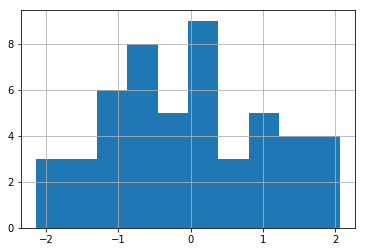

In [16]:
gen_train['F13'].hist()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score

def qFold_accuracy(x,y, estimator, cv_strategy):
    score = 0
    for train_indices, test_indices in cv_strategy:
        estimator.fit(x[train_indices], y[train_indices])
        score += estimator.score(x[test_indices], y[test_indices])
    return score/len(cv_strategy)

## q-Fold on train sample

In [41]:
# Проводим эксперимент по нестройке классификатора, опирающегося на 1 признак

max_score = 0
f=0 
cv_k = 10
# kf = KFold(L,cv_k)                                 
kf = StratifiedKFold(np.asarray(gen_train['Label']), cv_k, shuffle = True) 
for j in range(1,d+1):       # номер признака
    #    print '\n', '\n' #, kf_1

    scrrr  = qFold_accuracy(np.asarray(gen_train[[gen_train.columns[j]]]),np.asarray(gen_train[['Label']]).ravel(),
                            KNeighborsClassifier(n_neighbors=1), kf)
#    print i,"-th feature = ",scrrr
    if(scrrr > max_score):
        max_score = scrrr
        f = j-1

In [42]:
print('Score on Validation Set (CV1) %.2f%%' % (max_score*100))
print('Best feature №:',f)

Score on Validation Set (CV1) 86.00%
Best feature №: 916


## Assessment on estimation set

In [45]:
# estimation set
gen_test = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(1)] 
        for i in range(100)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(1)])

In [46]:
# True score on Test Set
clf = DecisionTreeClassifier()
clf.fit(np.asarray(gen_train[['F'+str(f)]]), np.asarray(gen_train[['Label']]))

print('Score on Validation Set (CV1) %.2f%%' % (100*accuracy_score(clf.predict(np.asarray(gen_test[['F0']])), np.asarray(gen_test[['Label']]))))

Score on Validation Set (CV1) 50.00%
